In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/1.01. Simple linear regression.csv")

In [ ]:
df.head

<bound method NDFrame.head of      SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isnull().sum()

SAT    0
GPA    0
dtype: int64

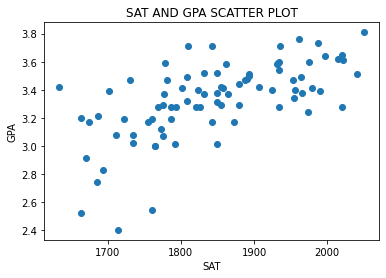

In [ ]:
plt.scatter(x =df.SAT, y = df.GPA)
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.title("SAT AND GPA SCATTER PLOT")
plt.show()

In [ ]:
sat = df.drop("GPA", axis = "columns")
gpa = df.drop("SAT", axis = "columns")
print("shape of X = ", sat.shape)
print("shape of y = ", gpa.shape)

shape of X =  (84, 1)
shape of y =  (84, 1)


In [ ]:
from sklearn.model_selection import train_test_split
sat_train, sat_test,gpa_train,gpa_test = train_test_split(sat,gpa, test_size = 0.2, random_state=51)
print("shape of sat_train = ", sat_train.shape)
print("shape of gpa_train = ", gpa_train.shape)
print("shape of sat_test = ", sat_test.shape)
print("shape of gpa_test = ", gpa_test.shape)

shape of sat_train =  (67, 1)
shape of gpa_train =  (67, 1)
shape of sat_test =  (17, 1)
shape of gpa_test =  (17, 1)


In [ ]:
 # y = m * x + c
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()

In [ ]:
lr.fit(sat_train,gpa_train)

LinearRegression()

In [ ]:
lr.coef_

array([[0.00140264]])

In [ ]:
lr.intercept_

array([0.75538366])

In [ ]:
m = 0.00140264
c = 0.75538366
y = m * 1850 + c
print (y)

3.35026766


In [ ]:
dir(lr)

In [ ]:
help(lr.predict)

In [ ]:
gpa_pred  = lr.predict(sat_test)
gpa_pred

array([[3.45546984],
       [3.22403388],
       [3.36570074],
       [3.63080011],
       [3.40216943],
       [3.15951234],
       [3.35027167],
       [3.58170763],
       [3.14268063],
       [3.3811298 ],
       [3.46809362],
       [3.18896782],
       [3.13005685],
       [3.54243365],
       [3.46809362],
       [3.28294485],
       [3.26190522]])

In [ ]:
help(pd.DataFrame)

In [ ]:
pd.DataFrame(np.c_[sat_test, gpa_test, gpa_pred], columns = ["sat", "gpa","gpa_predicted"])

,sat,gpa,gpa_predicted
0,1925.0,3.40,3.455470
1,1760.0,2.54,3.224034
2,1861.0,3.58,3.365701
3,2050.0,3.81,3.630800
4,1887.0,3.47,3.402169
5,1714.0,2.40,3.159512
6,1850.0,3.38,3.350272
7,2015.0,3.62,3.581708
8,1702.0,3.39,3.142681
9,1872.0,3.17,3.381130


In [ ]:
lr.score(sat_test,gpa_test)

0.40832077589616333

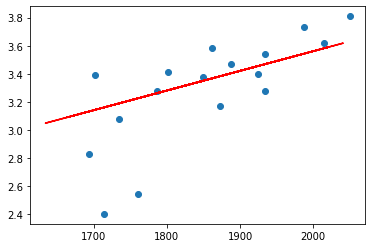

In [ ]:
plt.scatter(sat_test, gpa_test)
plt.plot(sat_train, lr.predict(sat_train), color = "r")